<a href="https://colab.research.google.com/github/JustAlex5/dl_class1/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.1 - A single neuron

Submitted by: [... **your name and ID** ...]


In [26]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

In [27]:
def gradient_descent (X, Y, alpha, T):
    n,d = X.shape
    w = np.zeros(d) # init w 
    J = np.zeros(T) 

    for t in range(T):
                
        Z = X.dot(w) 
        Yhat = 1 / (1+np.exp(-Z))
        dw = np.dot(X.T,Yhat-Y) 
        w = w - alpha * dw
        loss = -Y*np.log(Yhat) - (1-Y)*np.log(1-Yhat)
        J[t] = np.sum(loss)        
        
    return w, J

## 1. Trivial 2D example

- Train our model (the single neuron) on the following dataset.

- Plot the learning curve of the loss function `J` to verify that it has converged.

- Visualize the results (as a scatter plot of the dataset on-top of the descision plane).

- Calculate the accuracy of the model: the percentage of the samples that was classified correctly $^*$

($^*$ if y_hat>0.5 and y=1 then that sample was classified correctly and vice versa)



X.shape = (200, 2)
Y.shape = (200,)


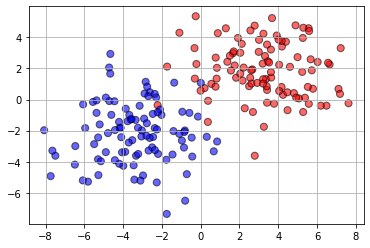

In [28]:
centers = [[-3,-2],[3, 2]]
X, Y = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=2)

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

plt.scatter(X[:,0],X[:,1],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.grid()
plt.show()

In [29]:



w,J = gradient_descent(X,Y, 0.001,100)

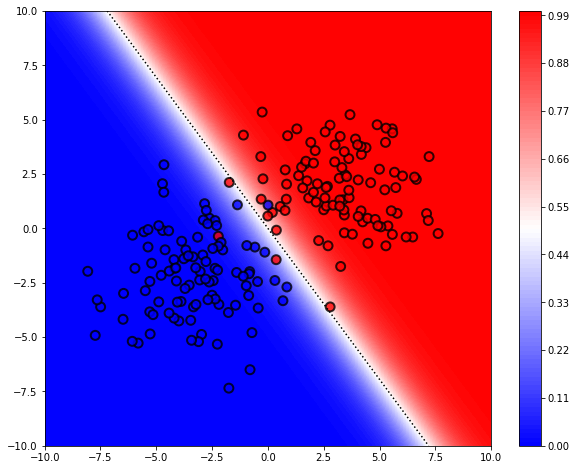

In [30]:
w1, w2 = w
x1_set = np.linspace(-10, 10, num=50)
x2_set = np.linspace(-10, 10, num=50)
x1,x2 = np.meshgrid(x1_set, x2_set)
z = w1*x1 + w2*x2
g = 1/(1+np.exp(-z)) # sigmoid 
        
plt.figure(figsize=(10,8))
plt.contourf(x1,x2,g,levels=100, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()
plt.contour(x1_set,x2_set,g, levels=[0.5], colors='black',linestyles=':')
plt.scatter(X[:,0], X[:,1], s=80, c=Y, cmap='bwr', alpha=0.8, edgecolor='k',linewidth=2)
plt.show()

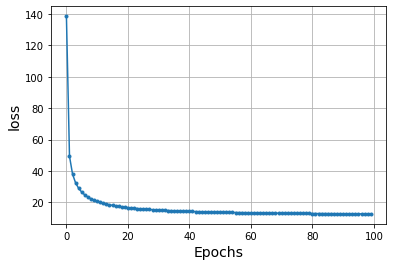

In [31]:
plt.plot(J,'.-')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.grid()
plt.show()

In [32]:
def Accuracy(X , Y, w):
    z = X.dot(w)
    yHat = 1/(1+np.exp(-z)) 
    yHat=np.around(yHat).astype(int)
    print(yHat)
    correct_pred=0
    wrong_pred=0
    for i in range(len(Y)):
        if(yHat[i]==Y[i]):
            correct_pred=correct_pred+1
        else:
            wrong_pred=wrong_pred+1
    return correct_pred/ (correct_pred+wrong_pred)


## 2. Add some bias

In order to train the model on the next dataset, you will need to add a bias term to the model (why?). 

You should do so, without changing the `gradient_descent` function.


X.shape = (200, 2)
Y.shape = (200,)


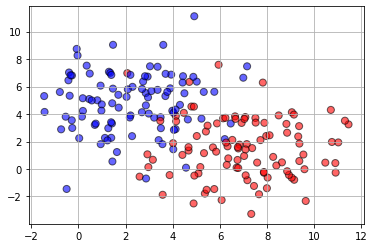

In [33]:
centers = [[2,5],[7, 2]]
X, Y = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=2)

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

plt.scatter(X[:,0],X[:,1],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.grid()
plt.show()

As before, 

- Train our model (the single neuron) on the following dataset.

- Plot the learning curve of the loss function `J` to verify that it has converged.

- Visualize the results (as a scatter plot of the dataset on-top of the descision plane).

- Calculate the accuracy of the model: the percentage of the samples that was classified correctly.


In [34]:

a= np.empty(len(X))
a.fill(1)
newX= np.column_stack((X,a))


In [35]:
w,J = gradient_descent(newX,Y, 0.001,200)

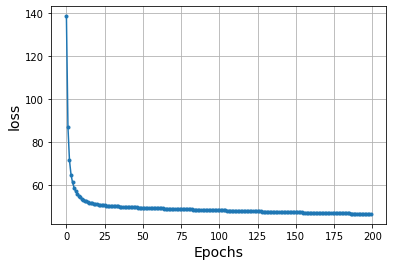

In [36]:
plt.plot(J,'.-')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.grid()

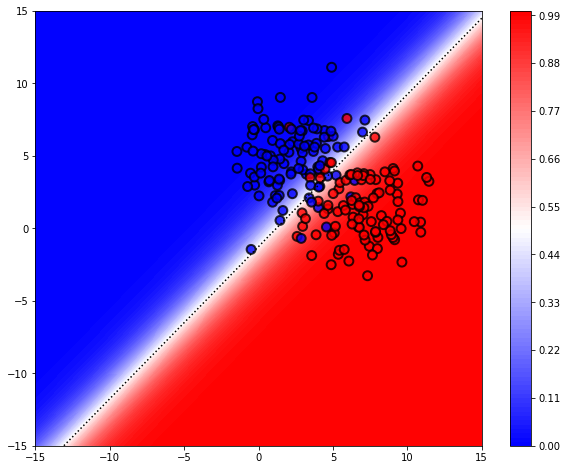

In [37]:
w1, w2,w3 = w
x1_set = np.linspace(-15, 15, num=50)
x2_set = np.linspace(-15, 15, num=50)

x1,x2 = np.meshgrid(x1_set, x2_set)
z = (w1*x1) + (w2*x2) +w3
g = 1/(1+np.exp(-z)) # sigmoid 
        
plt.figure(figsize=(10,8))
plt.contourf(x1,x2,g,levels=100, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()
plt.contour(x1_set,x2_set,g, levels=[0.5], colors='black',linestyles=':')
plt.scatter(X[:,0], X[:,1], s=80, c=Y, cmap='bwr', alpha=0.8, edgecolor='k',linewidth=2)
plt.show()

In [38]:
acc=Accuracy(newX,Y,w)
print(acc)

[0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1]
0.9


In [39]:
###  your code goes here...  (you can add more code cells if needed) ###


## 3. Let's go to higher dimension: 784-D

To push the limit of this single neuron, let's see if it can handle some real data. 

We will use a subset of the MNIST dataset (images of handwritten digits). 

In this example, we will trim the dataset to use only the samples of the '0' and '1' digits:

11501568/11490434 [==============================] - 0s 0us/step
X.shape = (2115, 28, 28)
Y.shape = (2115,)


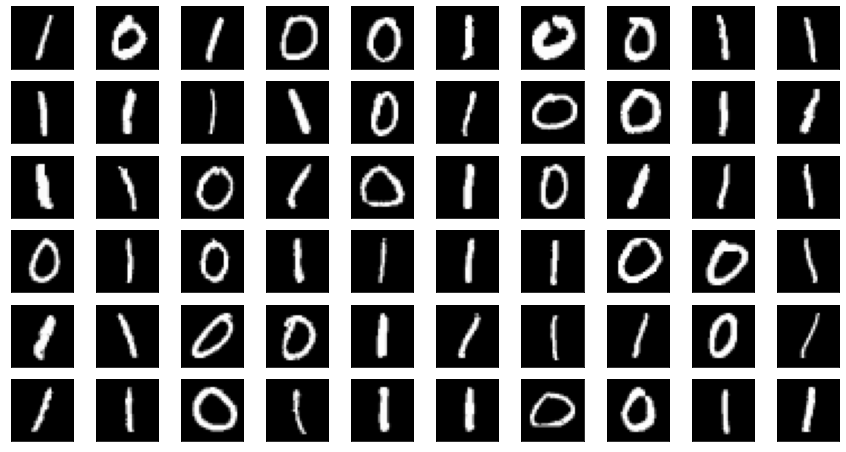

In [40]:
from tensorflow.keras.datasets import mnist
 
_, (X, Y) = mnist.load_data()
X = X.astype('float32') / 255.0
Y = Y.astype('float32')

ii = Y<2  # take only the samples with Y=0 or Y=1
X = X[ii]
Y = Y[ii]

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

# let's plot some examples
plt.figure(figsize=(15,8))
for i in range(60):
    plt.subplot(6,10,i+1)
    plt.imshow(X[i,:,:], cmap='gray')
    plt.xticks([]), plt.yticks([])

- Train our model (the single neuron) on this dataset.

- Plot the learning curve of the loss function `J` to verify that it has converged.

- Calculate the accuracy of the model: the percentage of the samples that was classified correctly $^*$

- Plot the values of final weights vector (784-D)

- Reshape the weights vector as a 28x28 image and use `plt.imshow` to visualize it. Use `cmap='bwr'` and add a colorbar (you can adjust the values using `vmin` and `vmax` to make sure it's symetric around zero). 

- Try to explain in a few words (english/hebrew) this last result - how is this neuron solving the problem?

Your answer: 
 

In [41]:
###  your code goes here...  (you can add more code cells if needed) ###


In [42]:
x=[]
for i in range(len(X)):
    x.append(np.array(X[i].flat))
x=np.array(x)

In [43]:
x.shape

(2115, 784)

In [44]:
w,j=gradient_descent(x,Y,0.001,100)
acc=Accuracy(x,Y,w)
print(acc)

[1 0 1 ... 1 0 1]
1.0


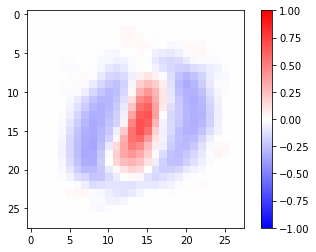

In [45]:
W=np.reshape(w,(28,28))
plt.imshow(W,cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
plt.show()

סיבה לכך שקיבלנו דיוק של 100% הוא כי ספרות 0 ו 1 שונות במהותן ולכן עבור ניירון אין בעיה לסווג אותם בצורה טובה. 

## Good Luck!

- please submit only the `.ipynb` file, after a full run of your code.